<a href="https://colab.research.google.com/github/erchiw/fa21_cs291_pj/blob/main/NoisyGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import cupy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from common import * ### need common.py in the same folder as this notebook

In [ ]:
X_train = np.load('./data/trainX.npy').astype('float32')
y_train = np.load('./data/trainY.npy').astype('float32')
train_label = np.load('./data/trainLabel.npy').astype('float32')
X_test = np.load('./data/testX.npy').astype('float32')
y_test = np.load('./data/testY.npy').astype('float32')
test_label = np.load('./data/testLabel.npy').astype('float32')
lr_30 = np.load('./data/lr_30.npy').astype('float32')
lr_300 = np.load('./data/lr_300.npy').astype('float32')
iters_30 = numpy.load('./data/iter_30.npy')
iters_300 = numpy.load('./data/iter_300.npy')

In [ ]:
base_clf = LogisticRegression(multi_class='multinomial', fit_intercept=True).fit(X_train.get(), train_label.get())
base_pred = base_clf.predict(X_train.get())

# clf report
print(classification_report(train_label.get(), base_pred))
print(classification_report(test_label.get(), base_clf.predict(X_test.get())))

# confuction matrix
from sklearn.metrics import confusion_matrix
base_cm = confusion_matrix(train_label.get(), base_pred)
print(base_cm)

# auc for train and test
auc_base_train = roc_auc_score(train_label.get(), base_clf.predict_proba(X_train.get()), multi_class='ovr')
auc_base_test = roc_auc_score(test_label.get(), base_clf.predict_proba(X_test.get()), multi_class='ovr')
print('auc for train and test:')
print(auc_base_train)
print(auc_base_test)

# Cross entropy loss
from sklearn import metrics
loss_base_train = metrics.log_loss(train_label.get(), base_clf.predict_proba(X_train.get()))
loss_base_test = metrics.log_loss(test_label.get(), base_clf.predict_proba(X_test.get()))
print('C-E loss for train and test:')
print(loss_base_train)
print(loss_base_test)

# # accuracy
acc_base_train = float(sum(base_clf.predict(X_train.get())==train_label.get())) / len(train_label.get())
acc_base_test = float(sum(base_clf.predict(X_test.get())==test_label.get())) / len(test_label.get())
print('acc for train and test:')
print(acc_base_train)
print(acc_base_test)

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85      4200
         1.0       0.00      0.00      0.00       700
         2.0       0.57      0.01      0.02       700
         3.0       0.61      0.52      0.56       700

    accuracy                           0.72      6300
   macro avg       0.48      0.38      0.36      6300
weighted avg       0.62      0.72      0.63      6300

              precision    recall  f1-score   support

         0.0       0.73      0.99      0.84      1260
         1.0       0.00      0.00      0.00       210
         2.0       0.00      0.00      0.00       210
         3.0       0.66      0.58      0.62       210

    accuracy                           0.73      1890
   macro avg       0.35      0.39      0.37      1890
weighted avg       0.56      0.73      0.63      1890

[[4179    0    0   21]
 [ 631    0    1   68]
 [ 547    0    8  145]
 [ 328    0    5  367]]
auc for train and test:
0.76798902116

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
rep = 10
# dataset params
n_train_sample = X_train.shape[0]
n_test_sample = X_test.shape[0]
n_feature = X_train.shape[1]
n_class = y_train.shape[1]


# params
beta_L = 2*np.sqrt(2)*n_train_sample
f0_minus_fniter_bound = np.log(n_class)*n_train_sample 
GS = 2*np.sqrt(2)

sigma = 30
sigma2 = 300
delta = 1e-6
clip_threshold = 0.01
eps_list = np.arange(0, 2.05, 0.05)

In [ ]:
# sigma=30
import time
tik = time.time()

tr_l_30, te_l_30, tr_auc_30, te_auc_30, tr_acc_30, te_acc_30, pre_tr_30, pre_te_30 = run_multiple_noisy_gd(X_train=X_train, y_train=y_train, 
                                                   X_test=X_test, y_test=y_test, 
                                                   eps_list=eps_list, rep=rep, delta=delta, sigma=30, 
                                                   beta_L=beta_L, f0_minus_fniter_bound=f0_minus_fniter_bound,
                                                   GS=GS, clip_threshold=clip_threshold, clip_or_not=True, lr=lr_30, iters=iters_30)

print("--- %s seconds ---" % (time.time() - tik))

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
--- 104.64819860458374 seconds ---


In [ ]:
# sigma=300
import time
tik = time.time()

tr_l_300, te_l_300, tr_auc_300, te_auc_300, tr_acc_300, te_acc_300, pre_tr_300, pre_te_300 = run_multiple_noisy_gd(X_train=X_train, y_train=y_train, 
                                                   X_test=X_test, y_test=y_test, 
                                                   eps_list=eps_list, rep=rep, delta=delta, sigma=300, 
                                                   beta_L=beta_L, f0_minus_fniter_bound=f0_minus_fniter_bound,
                                                   GS=GS, clip_threshold=clip_threshold, clip_or_not=True, lr=lr_300, iters=iters_300)

print("--- %s seconds ---" % (time.time() - tik))

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
--- 1550.703063249588 seconds ---


In [ ]:
length = len(eps_list)
# reshape
tr_l_30 = numpy.array(tr_l_30).reshape((length,rep))
te_l_30 = numpy.array(te_l_30).reshape((length,rep))
tr_auc_30 = numpy.array(tr_auc_30).reshape((length,rep))
te_auc_30 = numpy.array(te_auc_30).reshape((length,rep))
tr_acc_30 = numpy.array(tr_acc_30).reshape((length,rep))
te_acc_30 = numpy.array(te_acc_30).reshape((length,rep))
# calculate mean
m_tr_l_30 = numpy.mean(tr_l_30, axis=1)/n_train_sample
m_te_l_30 = numpy.mean(te_l_30, axis=1)/n_test_sample
m_tr_auc_30 = numpy.mean(tr_auc_30, axis=1)
m_te_auc_30 = numpy.mean(te_auc_30, axis=1)
m_tr_acc_30 = numpy.mean(tr_acc_30, axis=1)
m_te_acc_30 = numpy.mean(te_acc_30, axis=1)

In [ ]:
length = len(eps_list)
# reshape
tr_l_300 = numpy.array(tr_l_300).reshape((length,rep))
te_l_300 = np.array(te_l_300).reshape((length,rep))
tr_auc_300 = np.array(tr_auc_300).reshape((length,rep))
te_auc_300 = np.array(te_auc_300).reshape((length,rep))
tr_acc_300 = np.array(tr_acc_300).reshape((length,rep))
te_acc_300 = np.array(te_acc_300).reshape((length,rep))
# calculate mean
m_tr_l_300 = np.mean(tr_l_300, axis=1)/n_train_sample
m_te_l_300 = np.mean(te_l_300, axis=1)/n_test_sample
m_tr_auc_300 = np.mean(tr_auc_300, axis=1)
m_te_auc_300 = np.mean(te_auc_300, axis=1)
m_tr_acc_300 = np.mean(tr_acc_300, axis=1)
m_te_acc_300 = np.mean(te_acc_300, axis=1)

In [ ]:
base_loss_train_array = np.repeat(loss_base_train, len(eps_list))
base_loss_test_array = np.repeat(loss_base_test, len(eps_list))
base_auc_train_array = np.repeat(auc_base_train, len(eps_list))
base_auc_test_array = np.repeat(auc_base_test, len(eps_list))
base_acc_train_array = np.repeat(acc_base_train, len(eps_list))
base_acc_test_array = np.repeat(acc_base_train, len(eps_list))

# Compare 30 and 300

* loss

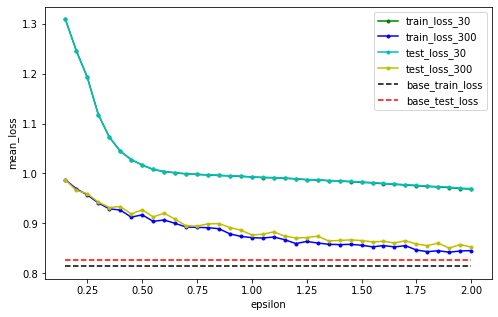

In [ ]:
inter = 3
#%matplotlib inline 
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter:], m_tr_l_30[inter:], 'g.-')
plt.plot(np.array(eps_list.get())[inter:], m_tr_l_300[inter:], 'b.-')
plt.plot(np.array(eps_list.get())[inter:], m_te_l_30[inter:], 'c.-')
plt.plot(np.array(eps_list.get())[inter:], m_te_l_300[inter:], 'y.-')
plt.plot(np.array(eps_list.get())[inter:], base_loss_train_array[inter:], 'k--')
plt.plot(np.array(eps_list.get())[inter:], base_loss_test_array[inter:], 'r--')
plt.legend(['train_loss_30','train_loss_300', 'test_loss_30', 'test_loss_300', 'base_train_loss', 'base_test_loss'])
plt.xlabel('epsilon')
plt.ylabel('mean_loss')
plt.show()

* auc

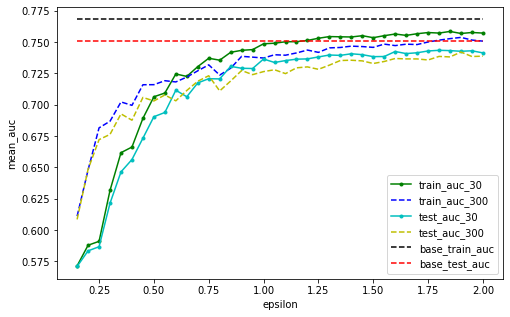

In [ ]:
inter2 = 3
#%matplotlib inline 
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter2:], m_tr_auc_30[inter2:], 'g.-')
plt.plot(np.array(eps_list.get())[inter2:], m_tr_auc_300[inter2:], 'b--')
plt.plot(np.array(eps_list.get())[inter2:], m_te_auc_30[inter2:], 'c.-')
plt.plot(np.array(eps_list.get())[inter2:], m_te_auc_300[inter2:], 'y--')
plt.plot(np.array(eps_list.get())[inter2:], base_auc_train_array[inter2:], 'k--')
plt.plot(np.array(eps_list.get())[inter2:], base_auc_test_array[inter2:], 'r--')
plt.legend(['train_auc_30','train_auc_300', 'test_auc_30', 'test_auc_300', 'base_train_auc', 'base_test_auc'])
plt.xlabel('epsilon')
plt.ylabel('mean_auc')
plt.show()

# 30

* loss

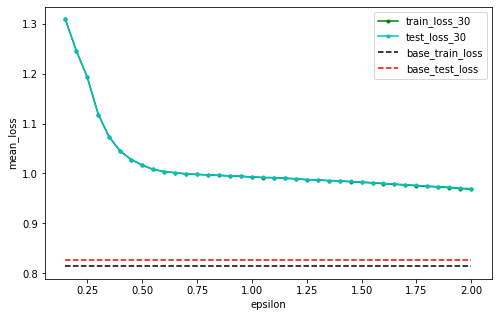

In [ ]:
inter = 3
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter:], m_tr_l_30[inter:], 'g.-')
plt.plot(np.array(eps_list.get())[inter:], m_te_l_30[inter:], 'c.-')
plt.plot(np.array(eps_list.get())[inter:], base_loss_train_array[inter:], 'k--')
plt.plot(np.array(eps_list.get())[inter:], base_loss_test_array[inter:], 'r--')
plt.legend(['train_loss_30','test_loss_30', 'base_train_loss', 'base_test_loss'])
plt.xlabel('epsilon')
plt.ylabel('mean_loss')
plt.show()

* auc

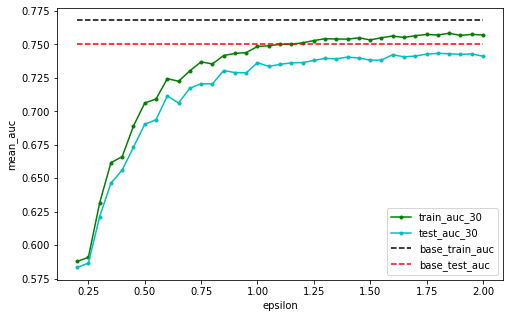

In [ ]:
inter2 = 4
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter2:], m_tr_auc_30[inter2:], 'g.-')
plt.plot(np.array(eps_list.get())[inter2:], m_te_auc_30[inter2:], 'c.-')
plt.plot(np.array(eps_list.get())[inter2:], base_auc_train_array[inter2:], 'k--')
plt.plot(np.array(eps_list.get())[inter2:], base_auc_test_array[inter2:], 'r--')
plt.legend(['train_auc_30', 'test_auc_30', 'base_train_auc', 'base_test_auc'])
plt.xlabel('epsilon')
plt.ylabel('mean_auc')
plt.show()

* acc

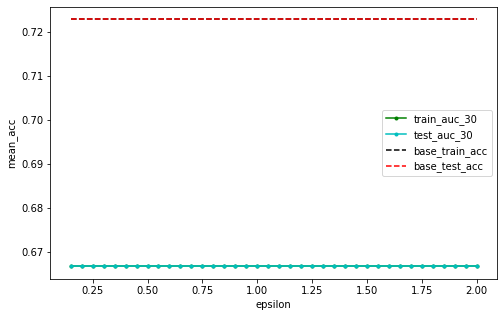

In [ ]:
inter2 = 3
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter2:], m_tr_acc_30[inter2:], 'g.-')
plt.plot(np.array(eps_list.get())[inter2:], m_te_acc_30[inter2:], 'c.-')
plt.plot(np.array(eps_list.get())[inter2:], base_acc_train_array[inter2:], 'k--')
plt.plot(np.array(eps_list.get())[inter2:], base_acc_test_array[inter2:], 'r--')
plt.legend(['train_auc_30', 'test_auc_30', 'base_train_acc', 'base_test_acc'])
plt.xlabel('epsilon')
plt.ylabel('mean_acc')
plt.show()

# 300

* loss

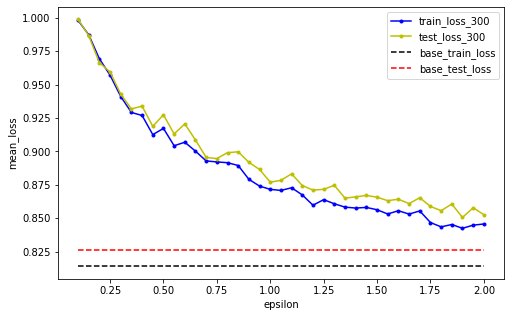

In [ ]:
inter = 2
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter:], m_tr_l_300[inter:], 'b.-')
plt.plot(np.array(eps_list.get())[inter:], m_te_l_300[inter:], 'y.-')
plt.plot(np.array(eps_list.get())[inter:], base_loss_train_array[inter:], 'k--')
plt.plot(np.array(eps_list.get())[inter:], base_loss_test_array[inter:], 'r--')
plt.legend(['train_loss_300','test_loss_300', 'base_train_loss', 'base_test_loss'])
plt.xlabel('epsilon')
plt.ylabel('mean_loss')
plt.show()

* auc

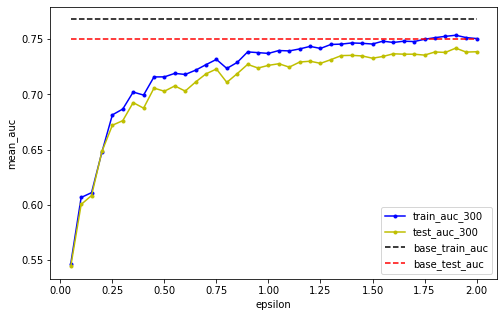

In [ ]:
inter = 1
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter:], m_tr_auc_300[inter:], 'b.-')
plt.plot(np.array(eps_list.get())[inter:], m_te_auc_300[inter:], 'y.-')
plt.plot(np.array(eps_list.get())[inter:], base_auc_train_array[inter:], 'k--')
plt.plot(np.array(eps_list.get())[inter:], base_auc_test_array[inter:], 'r--')
plt.legend(['train_auc_300','test_auc_300', 'base_train_auc', 'base_test_auc'])
plt.xlabel('epsilon')
plt.ylabel('mean_auc')
plt.show()

* acc

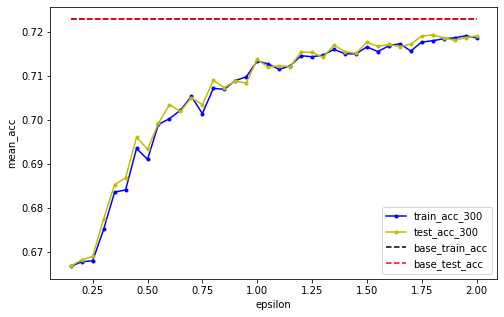

In [ ]:
inter2 = 3
plt.figure(figsize=(8, 5))
plt.plot(np.array(eps_list.get())[inter2:], m_tr_acc_300[inter2:], 'b.-')
plt.plot(np.array(eps_list.get())[inter2:], m_te_acc_300[inter2:], 'y.-')
plt.plot(np.array(eps_list.get())[inter2:], base_acc_train_array[inter2:], 'k--')
plt.plot(np.array(eps_list.get())[inter2:], base_acc_test_array[inter2:], 'r--')
plt.legend(['train_acc_300', 'test_acc_300', 'base_train_acc', 'base_test_acc'])
plt.xlabel('epsilon')
plt.ylabel('mean_acc')
plt.show()